In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import math
%matplotlib inline

In [9]:
titanic_data= pd.read_csv('titanic.csv')

In [10]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


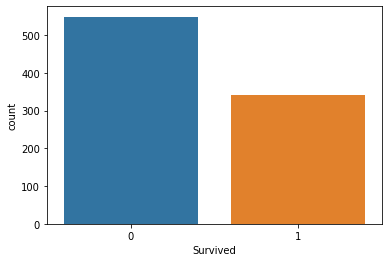

In [11]:
sns.countplot(x="Survived",data=titanic_data)

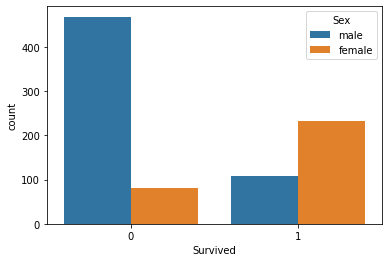

In [14]:
#testing some other plots to analyse the data
sns.countplot(x="Survived",hue='Sex',data=titanic_data)

In [15]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#DATA WRANGLING

In [16]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
#checking no of null values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

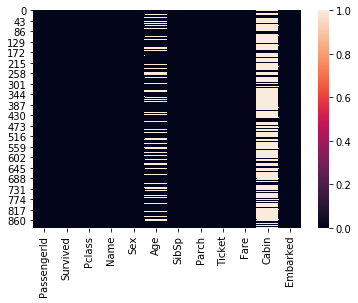

In [19]:
#plotting the heatMap
sns.heatmap(titanic_data.isnull())

In [21]:
#imputation(dropping /dummy fixing)
titanic_data.drop("Cabin",axis=1,inplace=True)

In [24]:
#dropping all the N/A (null) values
titanic_data.dropna(inplace=True
                   )

In [27]:
#dropping various fields...
sex = pd.get_dummies(titanic_data['Sex'],drop_first=True)
embark = pd.get_dummies(titanic_data['Embarked'],drop_first=True)
Pcl = pd.get_dummies(titanic_data['Pclass'],drop_first=True)

In [29]:
#concatinating with original data
titanic_data = pd.concat([titanic_data,sex,embark,Pcl],axis=1)
#dropping the fields for which dummy has been set or are useless
titanic_data.drop(['Sex','Embarked','PassengerId','Name','Ticket','Pclass'],axis=1,inplace=True)

In [30]:
#veiwing the wrangled data
titanic_data.head(10)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1,1,0,1,0,1
6,0,54.0,0,0,51.8625,1,0,1,0,0,1,0,1,0,0
7,0,2.0,3,1,21.0750,1,0,1,0,1,1,0,1,0,1
8,1,27.0,0,2,11.1333,0,0,1,0,1,0,0,1,0,1
9,1,14.0,1,0,30.0708,0,0,0,1,0,0,0,0,1,0
10,1,4.0,1,1,16.7000,0,0,1,0,1,0,0,1,0,1


In [31]:
titanic_data.drop(['male','Q','S','2','3'],axis=1,inplace=True)

KeyError: "['male' 'Q' 'S' '2' '3'] not found in axis"

In [32]:
#Training
X = titanic_data.drop("Survived",axis=1)
y=titanic_data["Survived"]

In [34]:
#splitting training and testing data (cross_validation is deprecated....instead use model selection)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression()

In [37]:
#fitting the data
logModel.fit(X_train,y_train)
predictions = logModel.predict(X_test)


C:\condaOctave\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#before i could have tested the accuracy using confusion matrix....This error came..